### Initial Exploratory Data Analysis

This notebook includes the code to perform some intial exploratory data analysis. 

#### Import Packages

In [8]:
import pandas as pd
import ast
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

#### Import Clean Dataset

In [2]:
df = pd.read_csv('clean_spotify_data_artistid.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

Display summary statistics for numerical columns

In [21]:
# Summary statistics
print(df.describe())

        acousticness   danceability   duration_ms         energy  \
count  169909.000000  169909.000000  1.699090e+05  169909.000000   
mean        0.493214       0.538150  2.314062e+05       0.488593   
std         0.376628       0.175346  1.213219e+05       0.267390   
min         0.000000       0.000000  5.108000e+03       0.000000   
25%         0.095000       0.417000  1.710400e+05       0.263000   
50%         0.492000       0.548000  2.086000e+05       0.481000   
75%         0.888000       0.667000  2.629600e+05       0.710000   
max         0.996000       0.988000  5.403500e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  169909.000000     169909.000000  169909.000000  169909.000000   
mean        0.084863          0.161936       5.200519       0.206691   
std         0.278679          0.309330       3.515257       0.176796   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000       

Audio feature that have the most diverse distributions

In [26]:
audio_features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 
                  'liveness', 'speechiness', 'valence', 'tempo']

std_dev = df[audio_features].std()

sorted_std_dev = std_dev.sort_values(ascending=False)
print(sorted_std_dev)

tempo               30.726937
acousticness         0.376628
instrumentalness     0.309330
energy               0.267390
valence              0.262407
liveness             0.176796
danceability         0.175346
speechiness          0.149937
dtype: float64


In [27]:
## Based on the standard deviations, we can provide each feature with weights for recommendation scoring. 

The significant variation in tempo suggests it should be normalized but retained as a key clustering dimension. The combination of acousticness and instrumentalness variability enables sophisticated instrumentation-based recommendations that could help surface different music styles.

Distribution of Popularity Scores 

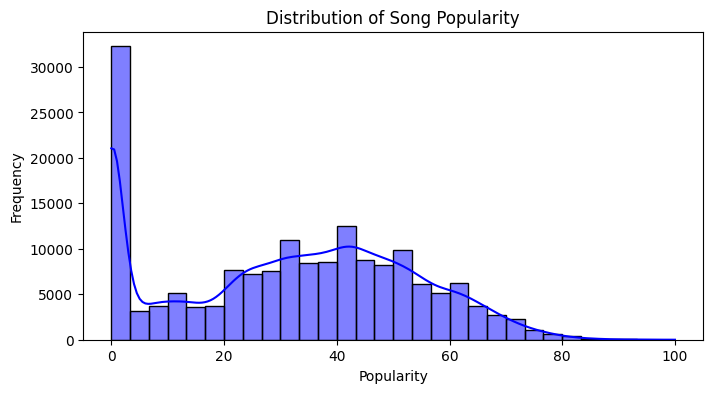

In [22]:
# Shows how popularity scores are distributed
plt.figure(figsize=(8,4))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

Top 10 Artists with Most Songs in the Dataset

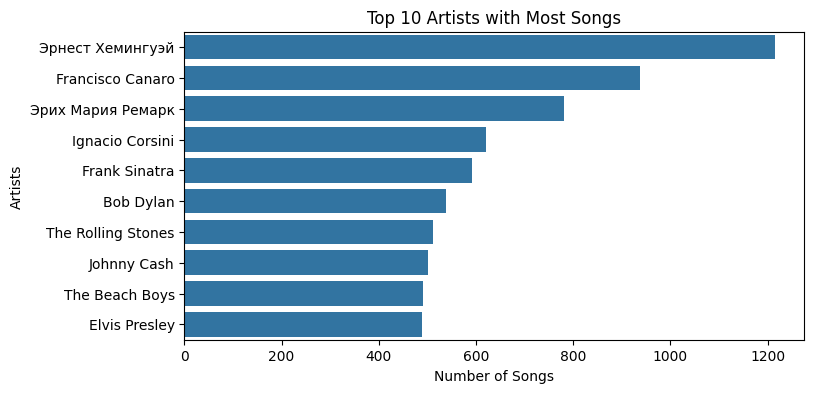

In [23]:
# Highlights artists with the most songs in dataset
top_artists = df['artists'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artists')
plt.show()

Examines the relationship between loudness and energy

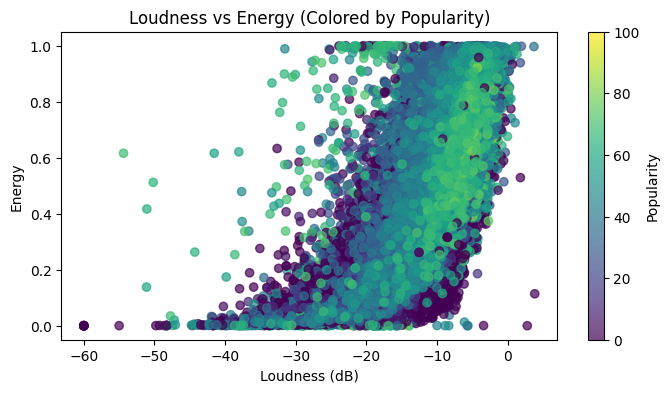

In [35]:
# Scatter plot of loudness vs energy with colorbar
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    x=df['loudness'], 
    y=df['energy'], 
    c=df['popularity'],      
    cmap='viridis', 
    alpha=0.7
)
plt.colorbar(scatter, label='Popularity')
plt.title('Loudness vs Energy (Colored by Popularity)')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.show()


Correleation Heatmap for Audio Features

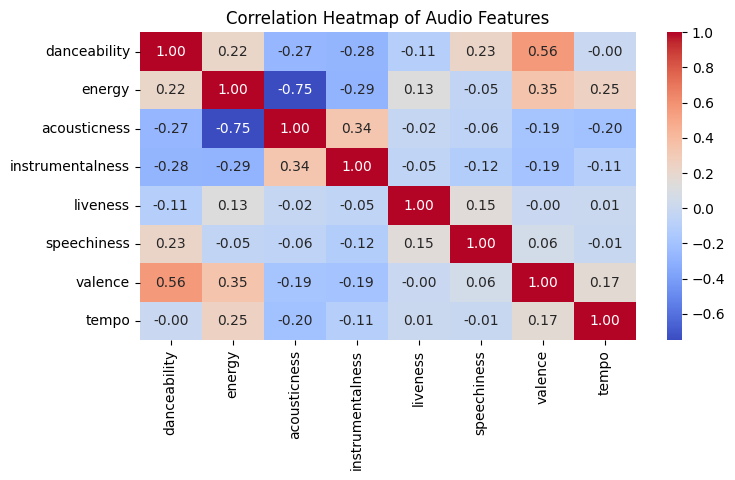

In [ ]:
# Examines relationship between audio features

plt.figure(figsize=(8, 4))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Audio Features')
plt.show()

From this heatmap, there is a strong inverse relationship between energy and acousticness. When energy increases, acousticness tends to decrease significantly, and vise versa. This suggests most high-energy songs in the dataset are amplified, while acoustic tracks tend to be softer or mellower. If a user prefers an acoustic with a certain threshold, we could recommend a song that has low energy features. This can filter electronic music. \
Valence and danceability has the highest positve correlation.